In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy
import cv2
import os
print("Module Imported")

Module Imported


In [4]:
train=ImageDataGenerator(rescale=1/125)
validation=ImageDataGenerator(rescale=1/125)

In [5]:
train_dataset=train.flow_from_directory('basedata/train/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('basedata/Validation/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                 ])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [46]:
fitmodel=model.fit(train_dataset,steps_per_epoch=10,epochs=30,validation_data=validation_dataset)

Epoch 1/30
10/10 [==============================] - 3s 316ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/30
10/10 [==============================] - 3s 315ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - 3s 315ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - 3s 313ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.4439e-04 - val_accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - 3s 337ms/step - loss: 6.0103e-04 - accuracy: 1.0000 - val_loss: 3.6266e-04 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 3s 329ms/step - loss: 3.3663e-04 - accuracy: 1.0000 - val_loss: 2.2242e-04 - val_accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - 3s 319ms/step - loss: 2.0495e-04 - accuracy: 1.0000 - val_loss: 1.2876e-04 -

1/1 [==============================] - 0s 31ms/step
This is dog


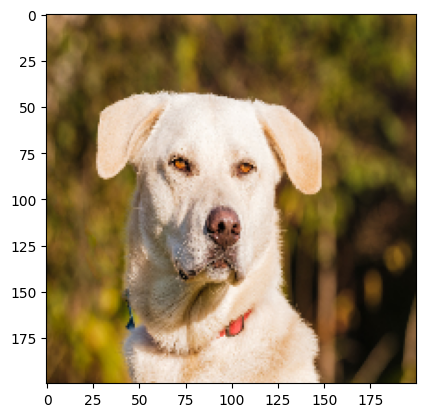

In [48]:
img=image.load_img('basedata/dog5.jpg',target_size=(200,200))
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
if(val==0):
    print("This is dog")
else:
    print("This is person")

plt.imshow(img)